## Тема: Линейная регрессия 

Используется датасет с данными о ценах на недвижимость. Оценим корреляцию между факторами, влияющими на цену недвижимости, и построим линейную регрессию для факторов с высокой линейной взаимосвязью. А потом попытаемся построить множественную линейную регрессию для оценки линейной взаимосвязи между совокупностью факторов и ценой недвижимости.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import pylab

In [4]:
df = pd.read_csv('C:/Users/yana/downloads/Data(1).csv')
df.head(10)

,Taxi_dist,Market_dist,Hospital_dist,Carpet_area,Builtup_area,Parking_type,City_type,Rainfall,Price_house
0,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000
5,6665.0,5142.0,9972.0,1442.0,1733.0,Open,CAT B,760,4526000
6,13153.0,11869.0,17811.0,1542.0,1858.0,No Parking,CAT A,1030,7224000
7,5882.0,9948.0,13315.0,1261.0,1507.0,Open,CAT C,1020,3772000
8,7495.0,11589.0,13370.0,1090.0,1321.0,Not Provided,CAT B,680,4631000
9,8233.0,7067.0,11400.0,1030.0,1235.0,Open,CAT C,1130,4415000


In [5]:
#Посмотрим пропуски:
df.isnull().sum()

Taxi_dist        13
Market_dist      13
Hospital_dist     1
Carpet_area       8
Builtup_area     15
Parking_type      0
City_type         0
Rainfall          0
Price_house       0
dtype: int64

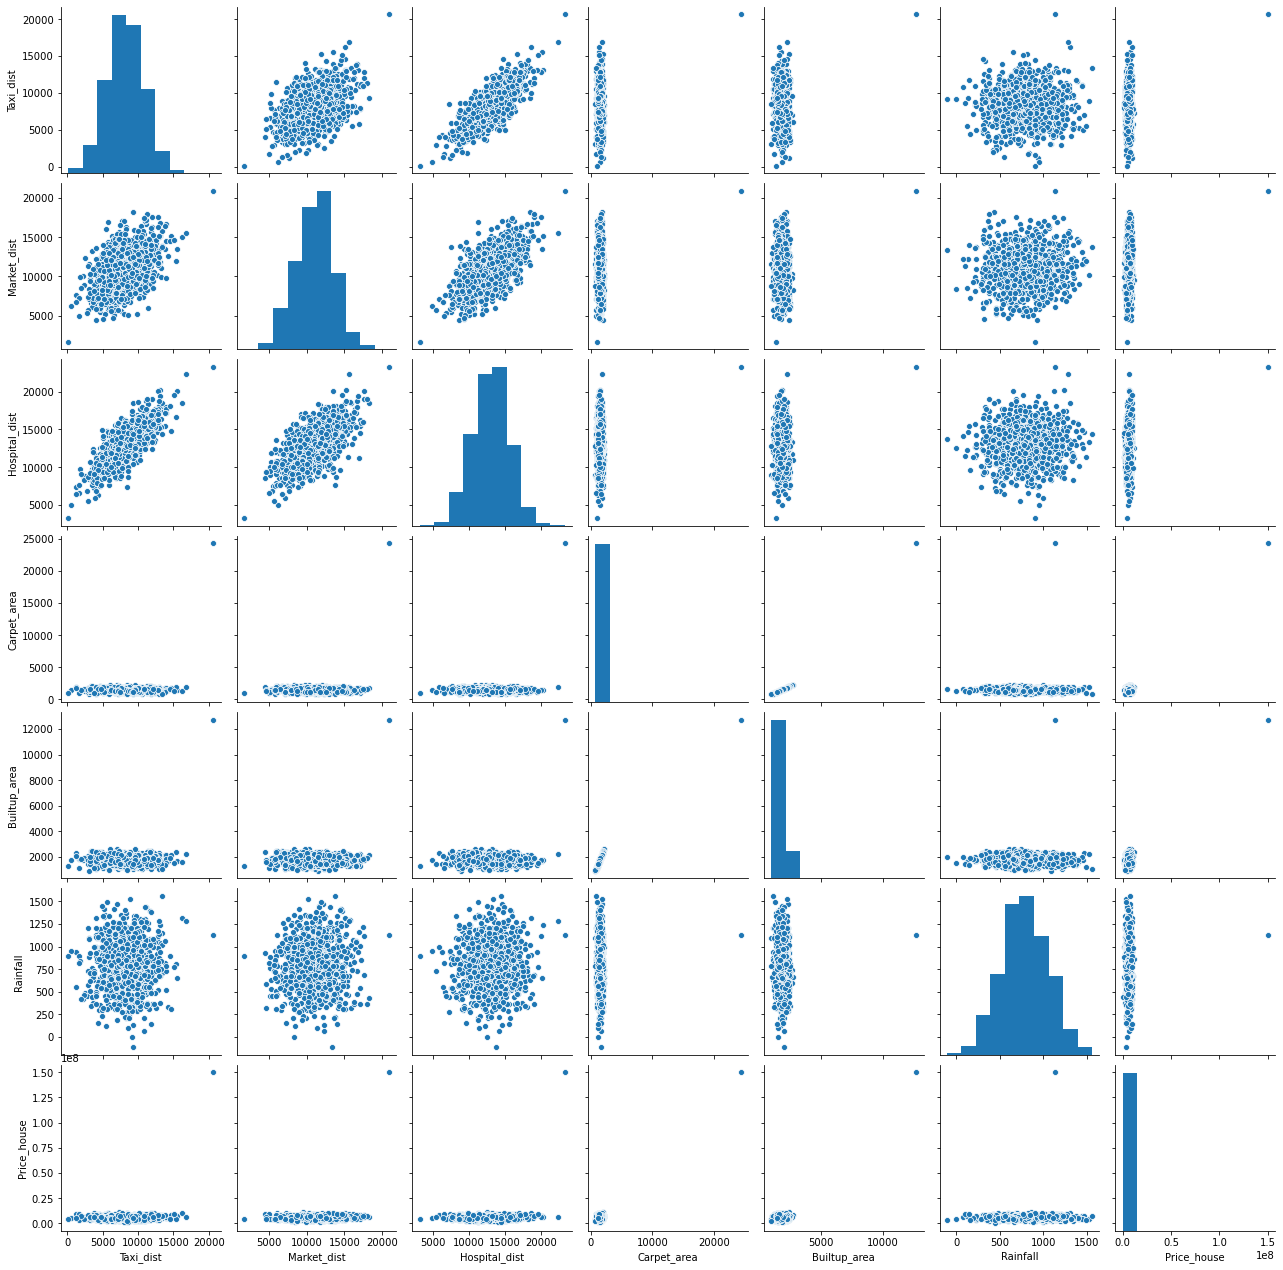

In [151]:
sns.pairplot(df)

На графиках видно, что имеется 1 строка с аномальными данными по всем признакам (строка с индексом 360).Поскольку EDA не является целью работы, сразу удалим эту строку. Пропуски заполним медианами без детального рассмотрения, поскольку распределение по всем количественным признакам близко к нормальному (особенно после удаления аномальной строки). Категориальный признаки в рамках данной работы рассматривать не будем 

In [6]:
df['Taxi_dist'].fillna(df['Taxi_dist'].median(), inplace=True)
df['Market_dist'].fillna(df['Market_dist'].median(), inplace=True)
df['Hospital_dist'].fillna(df['Hospital_dist'].median(), inplace=True)
df['Carpet_area'].fillna(df['Carpet_area'].median(), inplace=True)
df['Builtup_area'].fillna(df['Builtup_area'].median(), inplace=True)
df.drop(df.index[[360]],inplace=True)
df.drop(['Parking_type', 'City_type'],axis=1,inplace=True)

После этого на графиках начинает прослеживаться линейная зависимость между некоторыми признаками: 
Carpet_area и Builtup_area
Taxi_dist и Hospital dist
Market_dist и Hospital dist

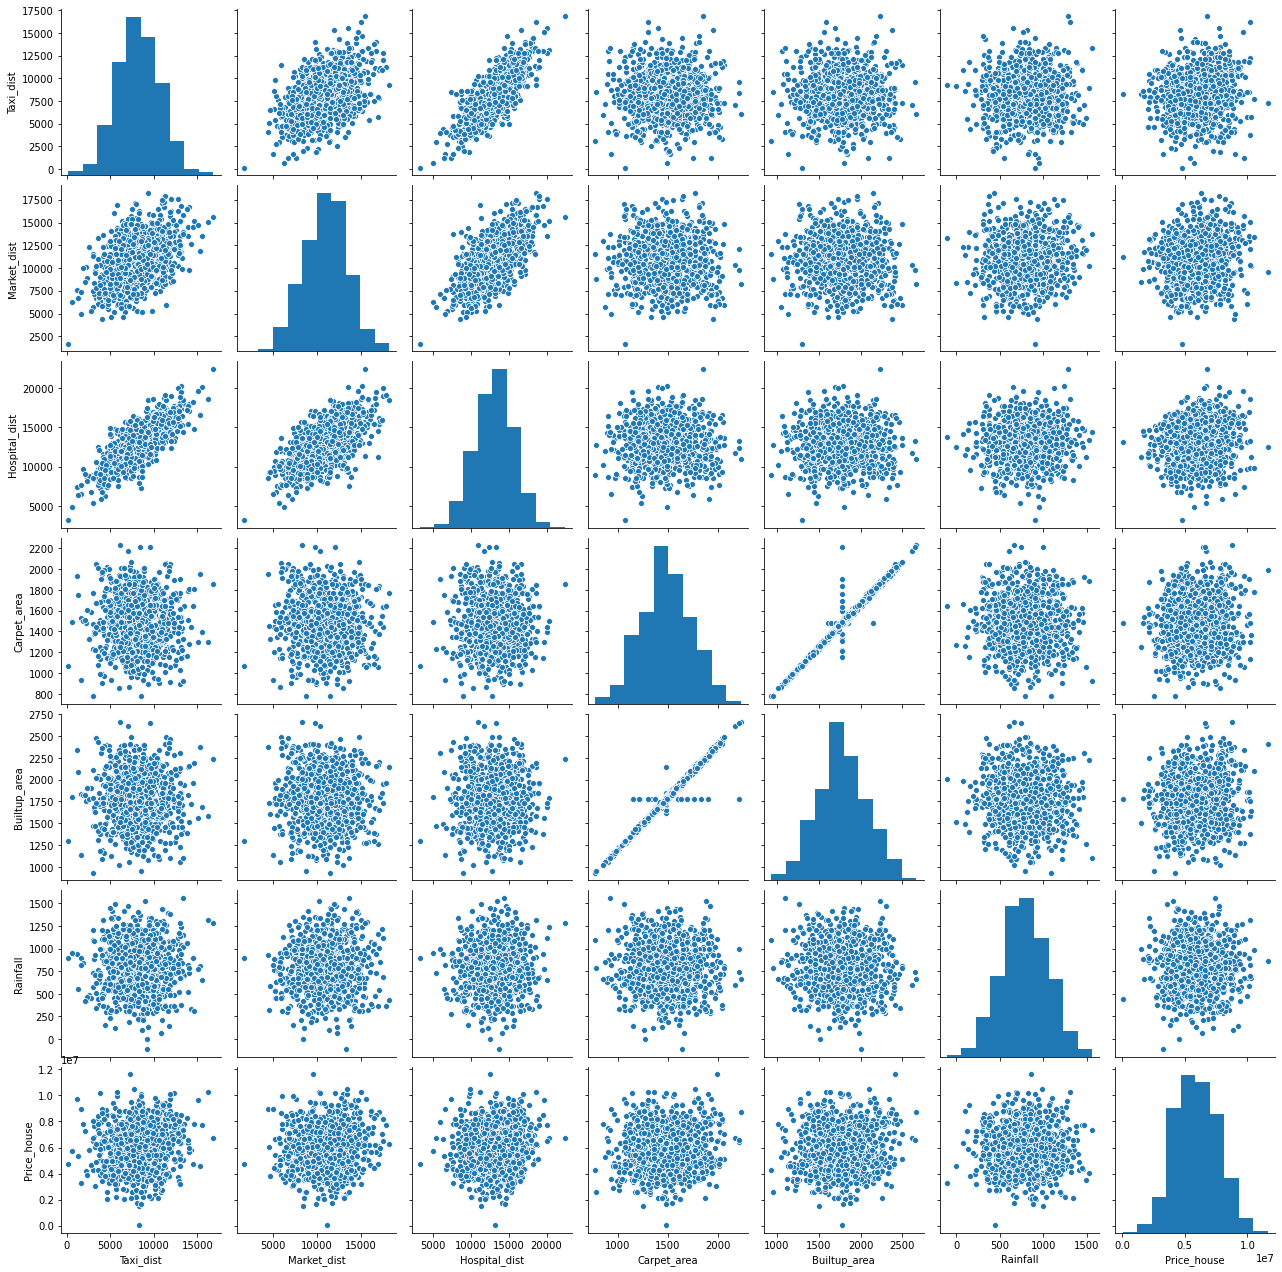

In [153]:
sns.pairplot(df)

К данным можно применять линейную регрессию, поскольку выполняются необходимые условия:
1) данные непрерывны

2) распределение очень близко к нормальному (ниже qq-графики, подтверждающие нормальность распределения)

3) данные по объектам недвижимости независимы друг от друга (xi не зависит от другого xi, yi - от другого yi)

4) по некоторым признакам наблюдается гомогенность дисперсии ошибки, при любых Xi дисперсия ошибок находится в определенном диапазоне, не наблюдается постоянного увеличения/уменьшения дисперсии при разных Xi (ниже пример для "Carpet_area" и "Builtup_area"


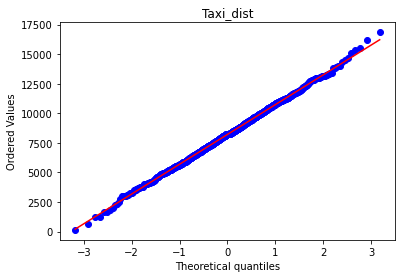

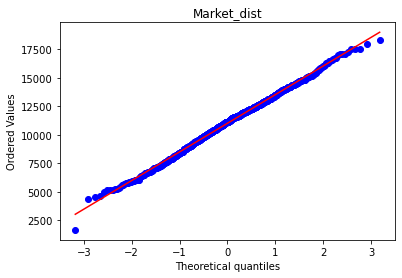

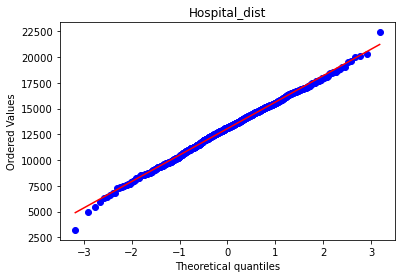

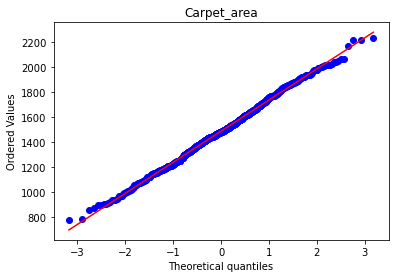

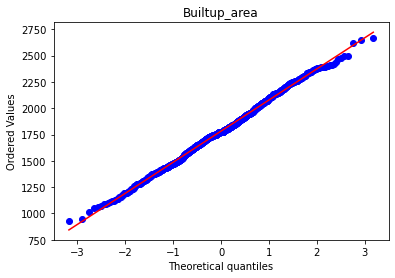

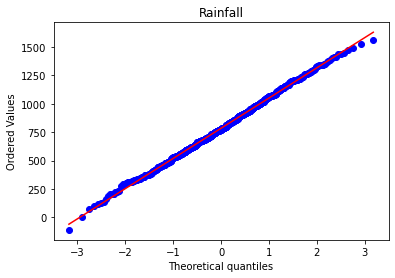

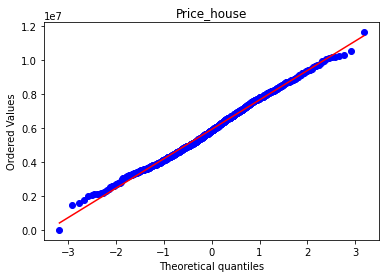

In [154]:
for el in df:
    stats.probplot(df[el], dist='norm', plot = pylab)
    pylab.title(el)
    pylab.show()  
    

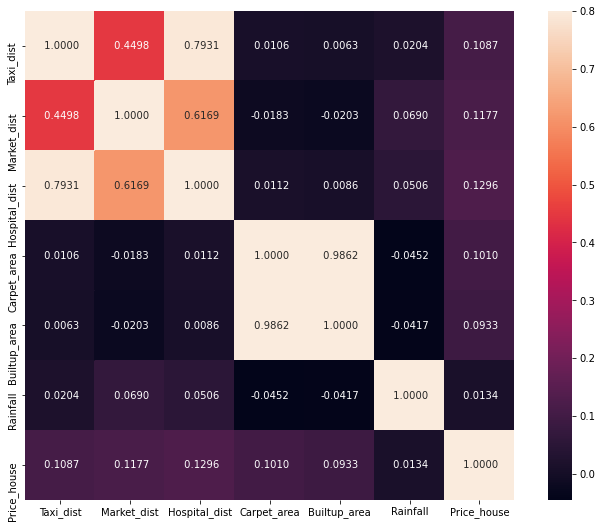

In [155]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df.corr(), vmax=.8, annot=True, fmt=' .4f', square=True);

Для построения наиболее эффекивной линейной модели рассмотрим признаки с наиболее высокой корреляцией - "Carpet_area" и "Builtup_area".
Посчитаем ковариацию и к-т корреляции Пирсона вручную:

In [7]:
ca = np.array([df['Carpet_area']])
ba = np.array([df['Builtup_area']])
ca = ca.reshape(931, 1)
ba = ba.reshape(931, 1)

In [8]:
cov = np.mean(ca*ba) - np.mean(ca)*np.mean(ba)
cov

72376.46944428748

In [9]:
r = cov / (np.std(ca)*np.std(ba))
r

0.9861604359369522

In [10]:
# коэффициент детерминации:
R2 = r**2
R2

0.9725124054073597

Судя по коэффициенту R2, линейная модель в данном случае должна быть очень эффективна. Посчитаем коэффициенты линейной регрессии:

In [11]:
b = (np.mean(ca*ba)-np.mean(ca)*np.mean(ba)) / (np.mean(ca**2) - np.mean(ca)**2)
b

1.169879926823425

In [12]:
a = np.mean(ba)-b*np.mean(ca)
a

43.09494297887636

In [13]:
y_hat = a + b*ca
mse = ((ba-y_hat)**2).sum()/len(ba)
mse

2393.2070331701652

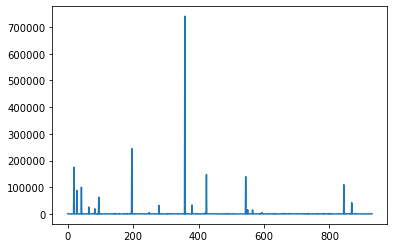

In [163]:
#дисперсия ошибки держится в определенных пределах, поэтому для "Carpet_area" и "Builtup_area" применять линейную регрессию можно
plt.plot((ba-y_hat)**2)

In [164]:
#найдем коээфициенты матричным способом
X = np.hstack([np.ones((931, 1)), ca])
coeff = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T@ba)
coeff

array([[43.09494298],
       [ 1.16987993]])

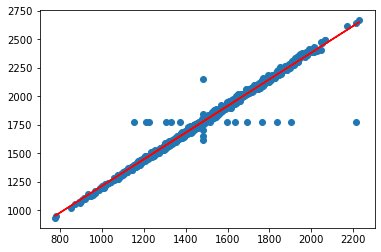

In [165]:
plt.scatter(ca, ba)
plt.plot(ca, a+b*ca, color='red')

plt.show()

In [166]:
# поиск коэффициентов с помощью градиентного спуска:
B0=0.1
B1=0.1
n=len(ca)
mse=np.sum((B0+B1*ca-ca)**2)/n
for i in range(200001):
    B0 +=0.0000001*np.sum((B0+B1*ca-ba)**2)/n
    B1 -=0.0000001*(2/n)*np.sum((B0+B1*ca-ba)*ca)
    if np.sum((B0+B1*ca-ba)**2)/n < mse:
        mse = np.sum((B0+B1*ca-ba)**2)/n
    else:
        break
    if i%10000==0:
        print(f'iteration: {i}, B0 = {B0}, B1={B1}, mse={np.sum((B0+B1*ca-ba)**2)/n}')

iteration: 0, B0 = 0.3743264048442535, B1=0.5991549543116779, mse=817236.5845139953
iteration: 10000, B0 = 2.9301120393523257, B1=1.196153661126221, mse=2437.1081779010633
iteration: 20000, B0 = 5.364612357952177, B1=1.1945611493738368, mse=2431.947529450008
iteration: 30000, B0 = 7.794118319724525, B1=1.1929719046710834, mse=2427.119053225675
iteration: 40000, B0 = 10.218960795065517, B1=1.1913857105812045, mse=2422.6201759655073
iteration: 50000, B0 = 12.639468172589073, B1=1.1898023522908985, mse=2418.448506914536
iteration: 60000, B0 = 15.055966540257154, B1=1.1882216164918333, mse=2414.6018351068865
iteration: 70000, B0 = 17.468779863898913, B1=1.1866432912638698, mse=2411.078126860684
iteration: 80000, B0 = 19.87823016332962, B1=1.1850671659598528, mse=2407.8755234814375
iteration: 90000, B0 = 22.284637686274472, B1=1.1834930310918421, mse=2404.992339169476
iteration: 100000, B0 = 24.68832108030162, B1=1.1819206782186416, mse=2402.4270591273244
iteration: 110000, B0 = 27.08959756

Оценим значимость модели с помощью F-критерия Фишера
$$F_{факт} = \frac{r_{xy}^{2} \cdot k2}{(k1 - r_{xy}^{2})}$$


In [167]:
n = 931
p = 2
alpha = 0.05
k1=p-1
k2 = n-p
F_fact = R2*k2 / (k1 - R2)
F_fact

32868.06423088534

Табличное значение F-критерия для k2=1000 (максимально близкое из найденных к реальному k2=929) = 3.85 на уровне значимости 5%, что значительно меньше, чем F_fact. Значит уравнение регрессии статистически значимо на уровне значимости 5%.

Качество модели найдем с помощью средней ошибки аппроксимации $\overline {A}$:

In [168]:
A_mean = 100 * np.mean(np.abs((ba - y_hat) / ba))
A_mean

0.9916211928486759

Так как $\overline {A}$ меньше 1% (не превышает 8-10 %), модель хорошо описывает данные

Оценим значимость параметров линейной регрессии с помощью t-статистики Стьюдента: на уровне значимости 5% t-табл = 1.962 при 1000 

In [169]:
s_residual = np.sqrt(np.sum((ba - y_hat)**2) / (n - 2))
m_a = s_residual * np.sqrt(np.sum(ca ** 2)) / (n * np.std(ca))
m_b = s_residual / (np.std(ca) * np.sqrt(n))
t_a = a/m_a
t_b = b/m_b

print(f'стандартная ошибка = {s_residual} \nслучайная ошибка ma = {m_a}, cлучайная ошибка mb = {m_b}\nнаблюдаемое значение ta = {t_a}, tb = {t_b}')

стандартная ошибка = 48.97304620896464 
случайная ошибка ma = 9.72949500824743, cлучайная ошибка mb = 0.006452889462971857
наблюдаемое значение ta = 4.429309326161938, tb = 181.29551630110223


Фактические значения t-статистики больше табличного значения, т.е. коэффициенты а и b статистически значимы

Вывод: линейная зависимость между данными в столбцах "Builtup_area" и "Carpet_area" настолько высока, что, возможно, имеет смысл удалить один из этих столбцов для построения модели по датасету в будущем, т.к. данные практически дублируют друг друга

Теперь попробуем построить модель множественной линейной регрессии для определения зависимости цены недвижимости от остальных признаков. По матрице корреляций и на графиках видно, что линейная зависимость между ценой недвижимости и перечисленными в датасете признаками крайне низкая, поэтому сразу можно сказать, что модель не будет эффективной. Следует искать нелинейные зависимости между данными. Но всё-таки подтвердим предположение расчетами:

In [14]:
# для начала нормализуем данные
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [15]:
td = np.array([df_scaled['Taxi_dist']])
td = td.reshape(931,1)
md = np.array([df_scaled['Market_dist']])
md = md.reshape(931,1)
hd = np.array([df_scaled['Hospital_dist']])
hd = hd.reshape(931,1)
ph = np.array([df_scaled['Price_house']])
ph = ph.reshape(931, 1)

In [16]:
#посчитаем коэффициенты матричным методом
X_tot = np.hstack([np.ones((931, 1)), td, md, hd, ca, ba])
coeff = np.dot(np.linalg.inv(np.dot(X_tot.T, X_tot)), X_tot.T@ph)
coeff

array([[-0.57370046],
       [ 0.02117091],
       [ 0.06625905],
       [ 0.07024188],
       [ 0.00125372],
       [-0.00072397]])

In [17]:
y_hat_total = coeff[0]+coeff[1]* td + coeff[2]*md+coeff[3]* hd + coeff[4]*ca+coeff[5]*ba
y_hat_total = y_hat_total.reshape(931,)
ph = ph.reshape(931,)

Text(0.5, 1.0, 'True vs Predicted values')

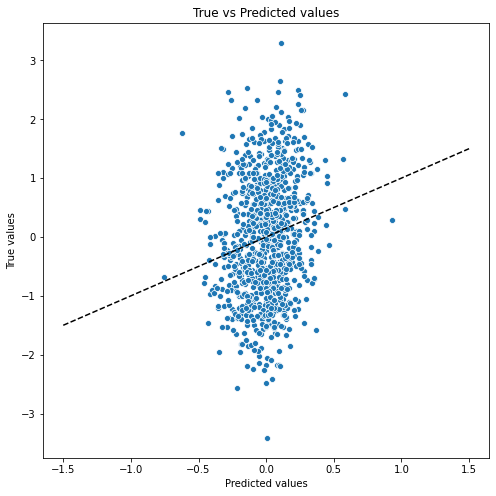

In [32]:
plt.figure(figsize=(8,8))
    
sns.scatterplot(x=y_hat_total, y=ph)
plt.plot([-1.5, 1.5], [-1.5, 1.5], linestyle='--', color='black') 
    
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('True vs Predicted values')

По графику видно, что y_hat плохо отражает действительность. В данном случае коэффициент детерминации также будет крайне низкий, модель совсем неэффективна

In [18]:
R2_total= np.sum((y_hat_total - np.mean(ph))**2) /np.sum((ph - np.mean(ph))**2)
R2_total

0.030757274954014303

In [175]:
#проверка
from sklearn.metrics import r2_score
r2_score(ph, y_hat_total)

0.030757274954014813